### Data Visualization - Ideal vs Encountered

In [1]:
#dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
pd.TimeSeries = pd.Series 

#plots
import matplotlib.pyplot as plt
import figurefirst
from figurefirst import FigureLayout,mpl_functions
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

#performance
import time 

### Load Data

In [2]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
# dir_save = '../../../Research/Images/container_odor/'
df = pd.DataFrame()
df = pd.read_hdf(dir+'NotWindy/NotWindyMA.h5')
dt= df.master_time[1]-df.master_time[0]

In [3]:
df.keys()

Index(['master_time', 'xsrc', 'ysrc', 'odor', 'trisonica_u', 'trisonica_v',
       'trisonica_pressure', 'trisonica_temperature', 'gps_linear_x',
       'gps_linear_y', 'gps_linear_z', 'imu_angular_x', 'imu_angular_y',
       'imu_angular_z', 'imu_linear_acc_x', 'imu_linear_acc_y',
       'imu_linear_acc_z', 'U', 'V', 'D', 'S2', 'corrected_u', 'corrected_v',
       'time', 'distance_from_source', 'nearest_from_streakline_',
       'relative_parallel_comp', 'relative_perpendicular_comp', 'efreq',
       'encounter_frequency', 'intermittency_fraction', 'intermittency_factor',
       'ma_fraction', 'nfs', 'whiff_plot'],
      dtype='object')

In [4]:
df["distance_from_source_a"]=np.sqrt(df.distance_from_source**2 - df.nearest_from_streakline_**2)

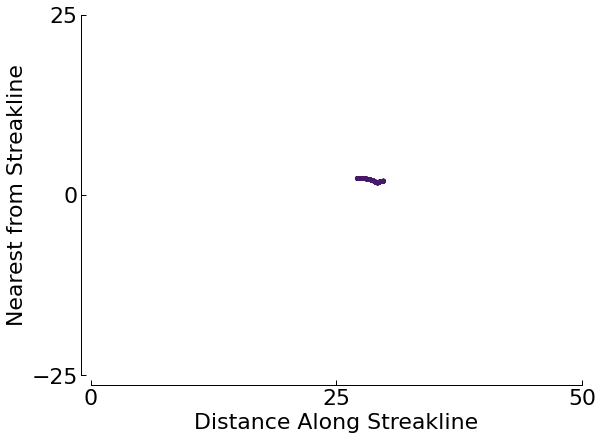

In [8]:
f , ax = plt.subplots(1,1, figsize=(8,6)) 

N=0
n=500
def animate(i):
    ax.cla()
    i=20*i
    if (i>500):          
        ax.scatter(df.distance_from_source_a.iloc[(i-n):i],df.nfs.iloc[(i-n):i], 
                   c = df.odor.iloc[(i-n):i], 
                   cmap = 'viridis', vmin =0 , vmax = 10, s =12)
#         N+=1
    else:
        ax.scatter(df.distance_from_source_a.iloc[:i],df.nfs.iloc[:i], c = df.odor.iloc[:i],
                   cmap = 'viridis', vmin =0 , vmax = 10, s =12 )
        
    mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={},
                            smart_bounds=True, xticks=[0,25,50],yticks=[-25,0,25],linewidth=1)

#     ax.set(xlim=(0,5), ylim=(0, -2))
    ax.set_xlabel("Distance Along Streakline")
    ax.set_ylabel("Nearest from Streakline")
    f.tight_layout(pad=1)
    figurefirst.mpl_functions.set_fontsize(f, 22)
    
anim = FuncAnimation(f, animate, interval=10, frames=30000, blit=False)
writervideo = FFMpegWriter(fps=500)
anim.save('../../Figure/test.mp4', writer=writervideo)

In [95]:
# HTML(anim.to_html5_video())

### Prepare Data

In [7]:
def streakline_container(eastwest,northsouth):
    ew = []
    ns= []
    for i in range((len(eastwest))-1,-1, -1): 
        ew.append(np.resize(np.array([eastwest-df.U[i]*dt]),(1,i)).flatten()) 
        ns.append(np.resize(np.array([northsouth-df.V[i]*dt]),(1,i)).flatten())  
    return ew,ns

def streakline_calculation(df):
    et = [np.sum(df.U[j:])*dt for j in range(0,len(df))]
    nt = [np.sum(df.V[j:])*dt for j in range(0,len(df))]
    return et, nt

In [52]:
et, nt = streakline_calculation(df)
ew, ns = streakline_container(et,nt)

In [6]:
dir_save = '../../../Research/Images/container_odor/'

In [48]:
count = 0
N=0
#for(upper, lower, step)

for i in range(0,10):   
    f = plt.figure(figsize =(16,10))
    ax = plt.axes (xlim=(-16,12), ylim=(-5,25))
    ax.set_xlabel('Longitude(meters)')
    ax.set_ylabel('Latitude(meters)')

    area = (np.arange(start = len(ew[i]), stop = 0, step = -1)*0.01)**2*4*m.pi #area
    ax.scatter(ew[i], ns[i], c='#FFA500', alpha = 0.3, s=np.sqrt(area), label="Expected Odor")
    
    if (count>500):          
        ax.scatter(df.xsrc[N:i],df.ysrc[N:i], c = df.odor[N:i], cmap = 'inferno', vmin =0 , vmax = 13, 
                   s =12, label="Encountered Odor")
        N+=N
        
    else:
        ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],cmap = 'inferno', vmin =0 , vmax = 13, 
                   s =12, label="Encountered Odor" )              
    count+=1
    f.tight_layout()
    figurefirst.mpl_functions.set_fontsize(f, 15)
    print(i)
    f.savefig(dir_save + "plot" + str(i) + ".jpg")
    plt.close()

### Imagewise Animation Odor_Expected vs Time

In [22]:
dir_save = '../../../Research/Images/container_wind/'

In [23]:
count = 0
N=0
for i in range(0,len(df)):
    
    f, ax = plt.subplots(1,1, figsize =(16,8))
    ax.set_xlim(-1,25)
    ax.set_ylim(-1,12)
    ax.axhline(0, color = 'red')
    ax.plot(0,0,'o', markersize = 20)
    
    if (count>500):          
        ax.scatter(df.distance_from_source[N:i],df.nearest_from_streakline[N:i], c = df.odor[N:i], cmap = 'inferno', vmin =0 , vmax = 13, s =12)
        N+=1
    else:
        ax.scatter(df.distance_from_source[:i],df.nearest_from_streakline[:i], c = df.odor[:i],cmap = 'inferno', vmin =0 , vmax = 13, s =12 )
    
    count+=1
    ax.set_xlabel('Distance from source to sensor(m)' , fontsize = 15)
    ax.set_ylabel('Shotest Distance \n Sensor from Streakline (m)' , fontsize = 15)
    figurefirst.mpl_functions.set_fontsize(f, 15)
    f.savefig(dir_save + "plot" + str(i) + ".jpg")
    plt.close()

In [14]:
# perform this locally using multiprocessing; does to work in Jupyter
# def plot_ts(inputs):
#     i, df = inputs
#     fig = plt.figure()
#     ax = plt.axes (xlim=(0,300), ylim=(0,2))
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Odor Concentration')
#     ax.plot(df.sync_time[:i],df.odor[:i])
#     fig.savefig(dir_save + "plot" + str(i) + ".jpg")
#     plt.close()    